In [21]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [22]:
output_dir = "output/full_data_fewer_temps/plots/"
ground_truth_path = "data/ECCCO_speedtest_runs/eccco_sp_puremaps_psf4pix_inelectrons_cm3perspersr_with_tables.fits"
output_slow_path = "output/full_data_fewer_temps/combined_ECCCO_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.01_wpsf.fits"
output_fast_path = "output/full_data_fewer_temps/combined_ECCCO_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.005_wpsf.fits"

ground_truth = fits.getdata(ground_truth_path)
output_slow = fits.getdata(output_slow_path)
output_fast = fits.getdata(output_fast_path)

with fits.open(ground_truth_path) as hdul:
    dep_table = hdul[2].data

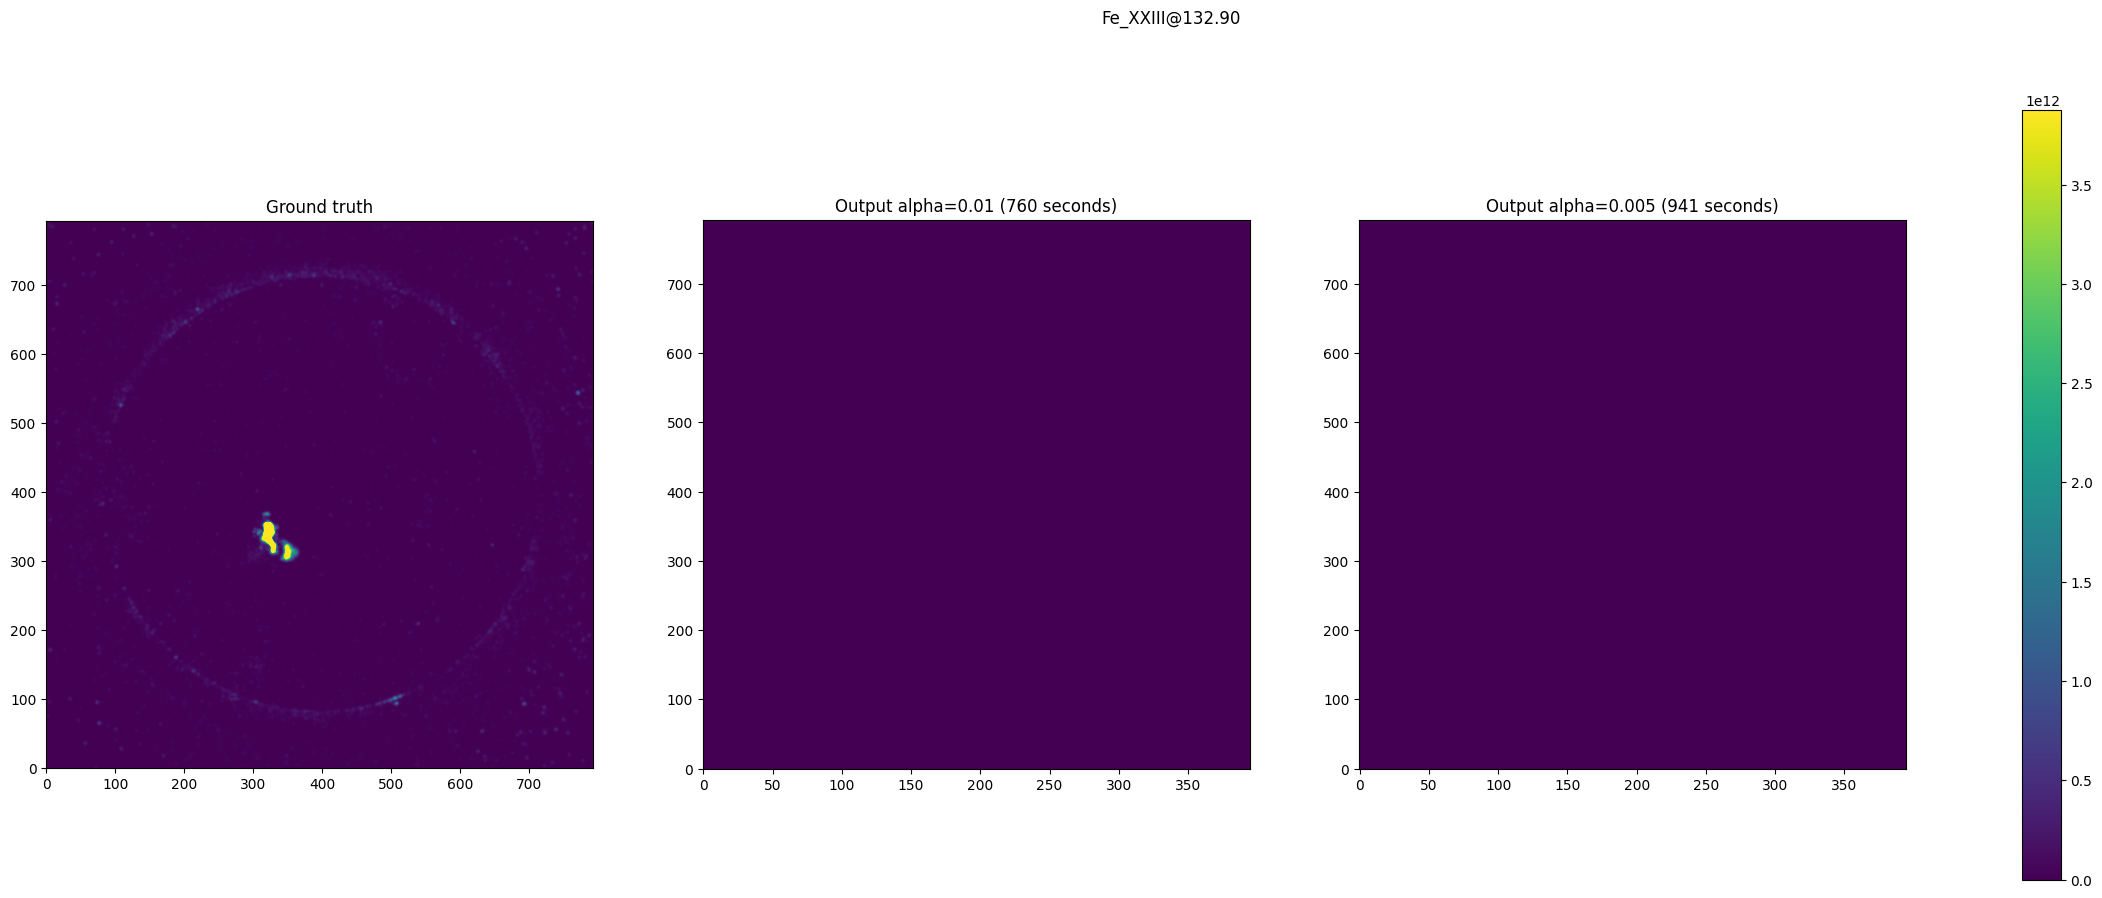

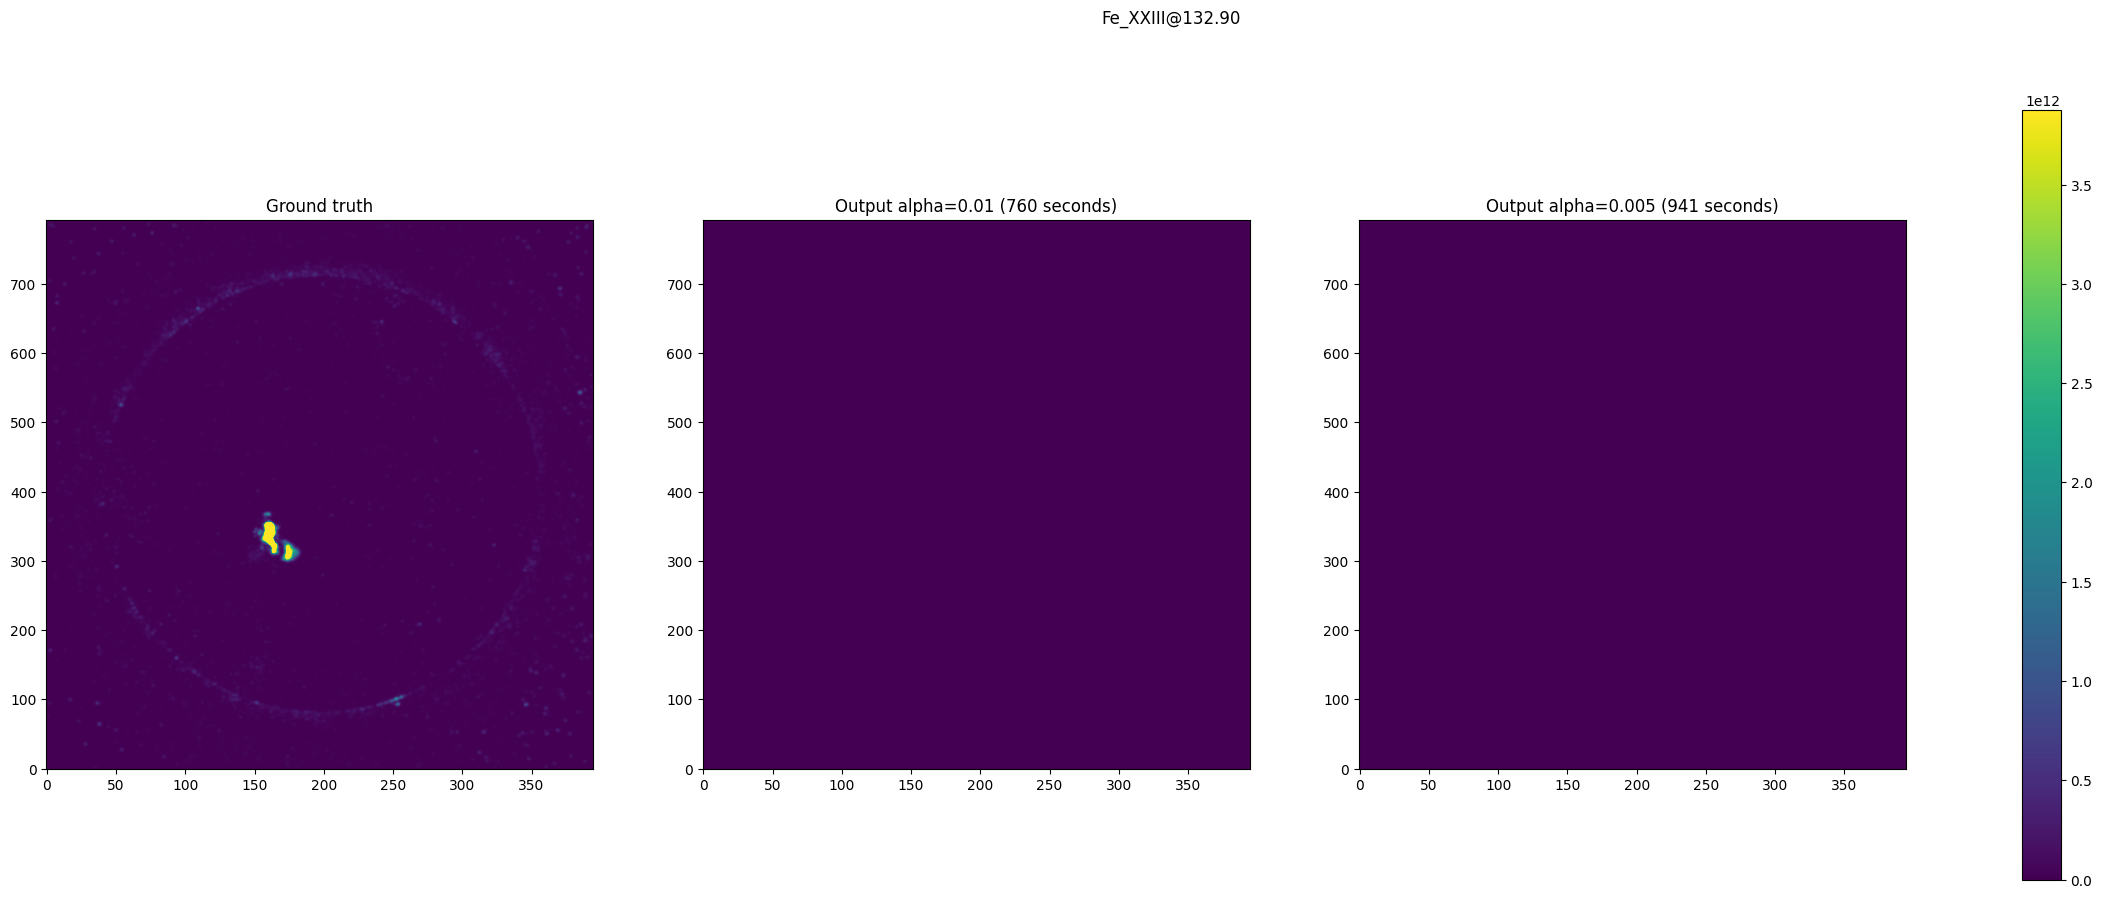

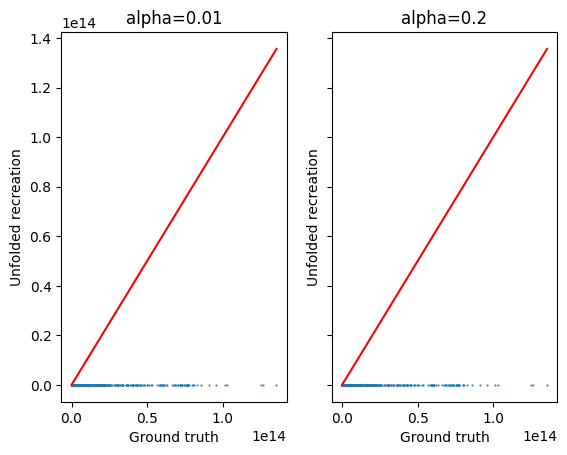

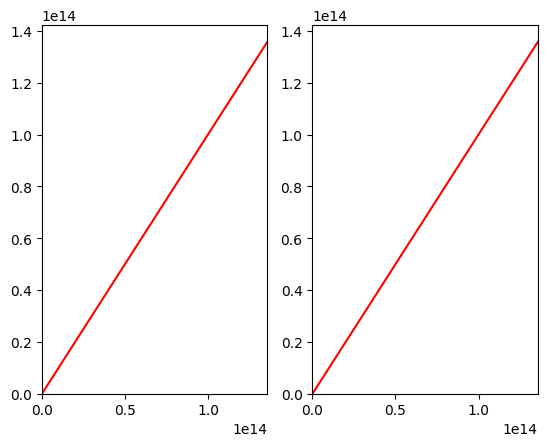

In [26]:
# for i in range(len(dep_table)):
i = 15
vmin, vmax = 0, np.nanpercentile(ground_truth[i], 99.9)

# initial image comparison
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))
im = axs[0].imshow(ground_truth[i], vmin=vmin, vmax=vmax, origin='lower')
axs[0].set_title("Ground truth")
axs[1].imshow(output_slow[i], vmin=vmin, vmax=vmax, origin='lower')
axs[1].set_title("Output alpha=0.01 (760 seconds)")
axs[1].set_aspect(0.5)
axs[2].imshow(output_fast[i], vmin=vmin, vmax=vmax, origin='lower')
axs[2].set_title("Output alpha=0.005 (941 seconds)")
axs[2].set_aspect(0.5)
fig.colorbar(im, ax=axs)
fig.suptitle(dep_table[i][1])
fig.savefig(output_dir + f"spectral_pure_{dep_table[i][1]}.png")

# reshaped image comparison
reshaped_ground_truth = np.mean([ground_truth[i][:, ::2][:, :-2],  
                                 ground_truth[i][:, 1::2][:, :-1]], axis=0)
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))
im = axs[0].imshow(reshaped_ground_truth, vmin=vmin, vmax=vmax, origin='lower')
axs[0].set_title("Ground truth")
axs[0].set_aspect(0.5)
axs[1].imshow(output_slow[i], vmin=vmin, vmax=vmax, origin='lower')
axs[1].set_title("Output alpha=0.01 (760 seconds)")
axs[1].set_aspect(0.5)
axs[2].imshow(output_fast[i], vmin=vmin, vmax=vmax, origin='lower')
axs[2].set_title("Output alpha=0.005 (941 seconds)")
axs[2].set_aspect(0.5)
fig.colorbar(im, ax=axs)
fig.suptitle(dep_table[i][1])
fig.savefig(output_dir + f"reshaped_spectral_pure_{dep_table[i][1]}.png")

# scatter plots
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)
axs[0].plot(reshaped_ground_truth.flatten(), output_slow[i].flatten(), '.', ms=1)
axs[0].plot([0, np.max(reshaped_ground_truth)], [0, np.max(reshaped_ground_truth)], 'r-')
axs[0].set_title("alpha=0.01")
axs[0].set_xlabel("Ground truth")
axs[0].set_ylabel("Unfolded recreation")
axs[1].plot(reshaped_ground_truth.flatten(), output_fast[i].flatten(), '.', ms=1)
axs[1].plot([0, np.max(reshaped_ground_truth)], [0, np.max(reshaped_ground_truth)], 'r-')
axs[1].set_title("alpha=0.2")
axs[1].set_xlabel("Ground truth")
axs[1].set_ylabel("Unfolded recreation")
fig.savefig(output_dir + f"scatter_{dep_table[i][1]}.png")

# histogram
Z_slow, xedges_slow, yedges_slow = np.histogram2d(reshaped_ground_truth.flatten(), output_slow[i].flatten(), 50)
Z_fast, xedges_fast, yedges_fast = np.histogram2d(reshaped_ground_truth.flatten(), output_fast[i].flatten(), 50)
fig, axs = plt.subplots(ncols=2)
axs[0].pcolormesh(xedges_slow, yedges_slow, np.log10(Z_slow.T+1E-3))
axs[0].plot([0, np.max(reshaped_ground_truth)], [0, np.max(reshaped_ground_truth)], 'r-')
axs[1].pcolormesh(xedges_fast, yedges_fast, np.log10(Z_fast.T+1E-3))
axs[1].plot([0, np.max(reshaped_ground_truth)], [0, np.max(reshaped_ground_truth)], 'r-')
fig.savefig(output_dir + f"histogram_{dep_table[i][1]}.png")

Text(0.5, 0.98, 'Fe_XXIII@132.90')

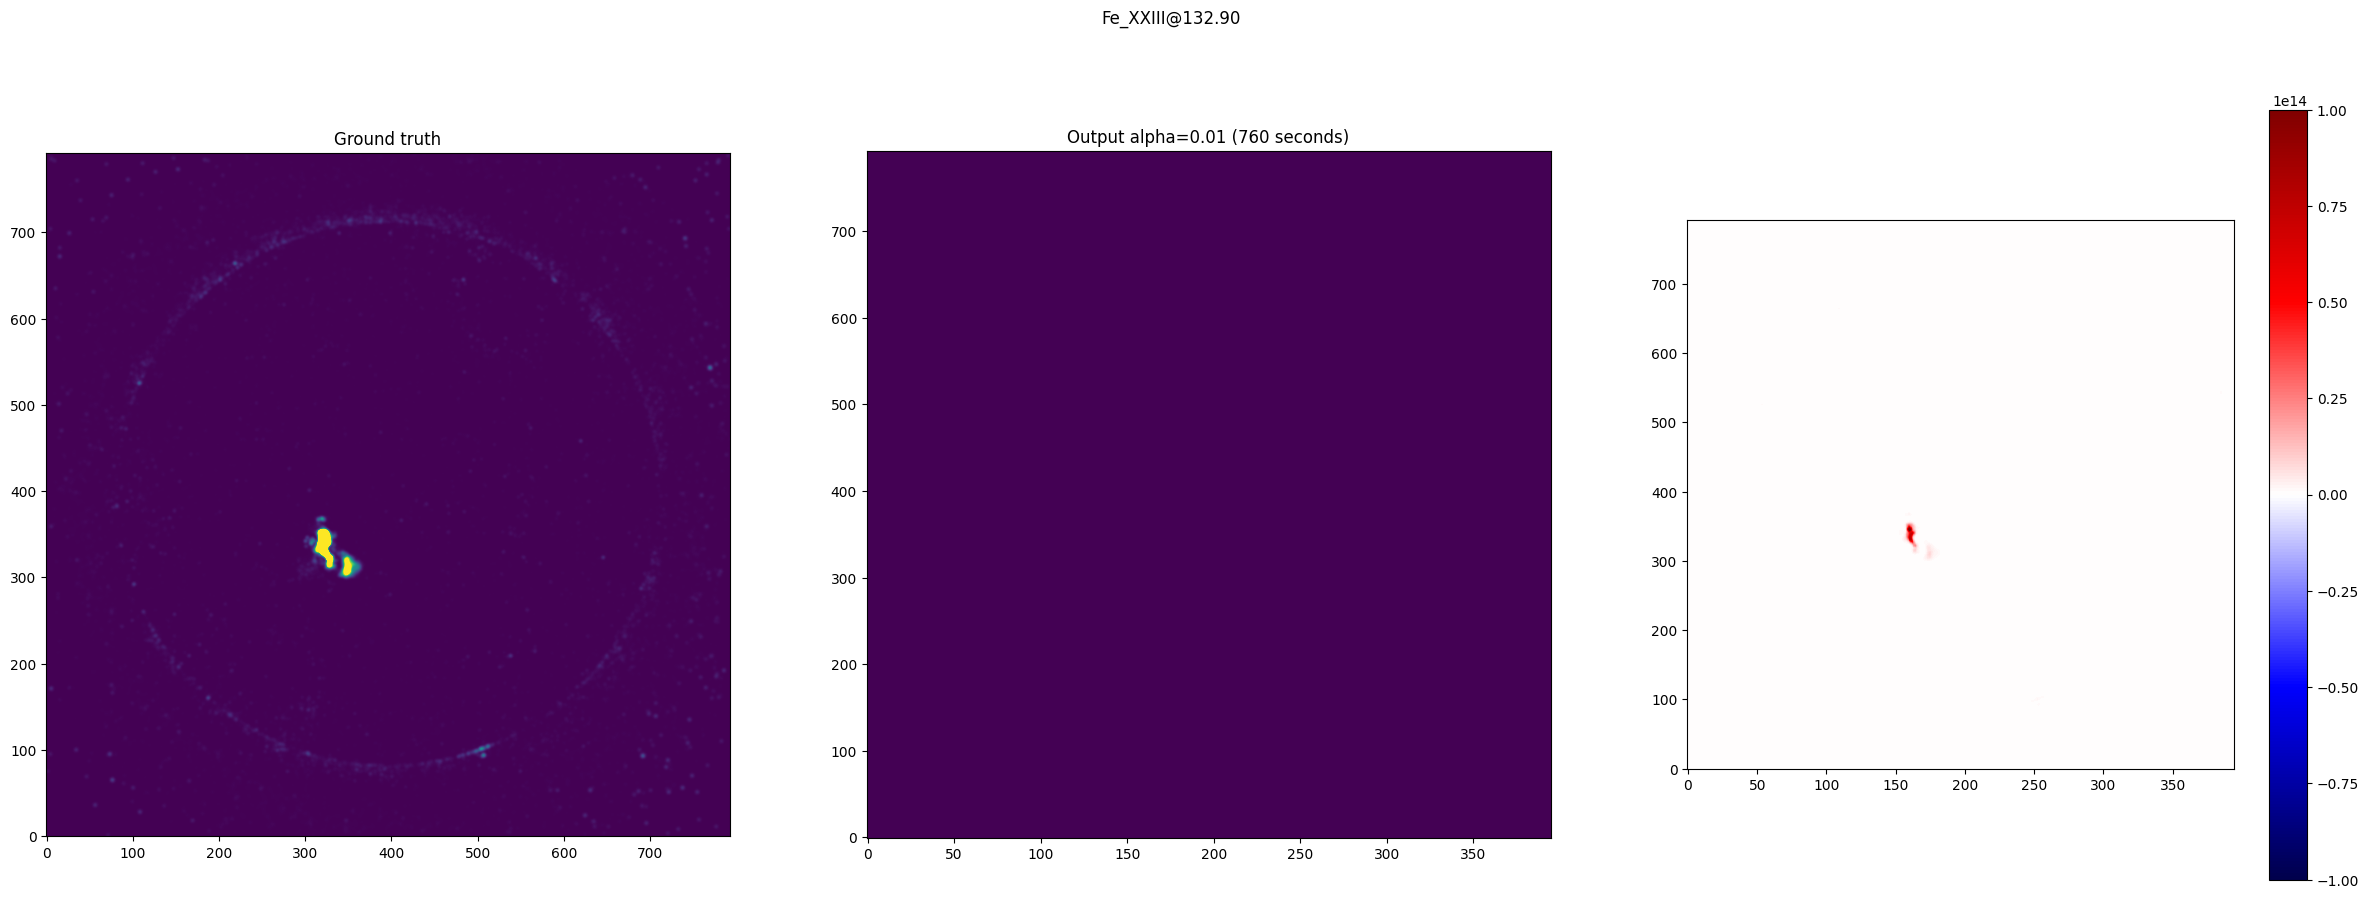

In [28]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))
axs[0].imshow(ground_truth[i], vmin=vmin, vmax=vmax, origin='lower')
axs[0].set_title("Ground truth")
axs[1].imshow(output_slow[i], vmin=vmin, vmax=vmax, origin='lower')
axs[1].set_title("Output alpha=0.01 (760 seconds)")
axs[1].set_aspect(0.5)
im = axs[2].imshow(reshaped_ground_truth-output_slow[i], origin='lower', cmap='seismic', vmin=-1E14, vmax=1E14)
axs[2].set_aspect(0.5)
fig.colorbar(im, ax=axs[2])
fig.suptitle(dep_table[i][1])


In [29]:
output_dir = "output/photons/plots/"
ground_truth_path = "output/photons/ground_truth_spectrally_pure_data_cube_reshaped.fits"
dep_ref = "data/ECCCO_speedtest_runs/eccco_sp_puremaps_psf4pix_inelectrons_cm3perspersr_with_tables.fits"
output_paths = ["output/photons/combined_ECCCO_trim_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.1_wpsf.fits",
                "output/photons/combined_ECCCO_trim_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.01_wpsf.fits",
                "output/photons/combined_ECCCO_trim_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.2_wpsf.fits",
                "output/photons/combined_ECCCO_trim_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.005_wpsf.fits"]

In [32]:
output = fits.open(output_paths[2])[0].data
ground_truth = fits.open(ground_truth_path)[0].data

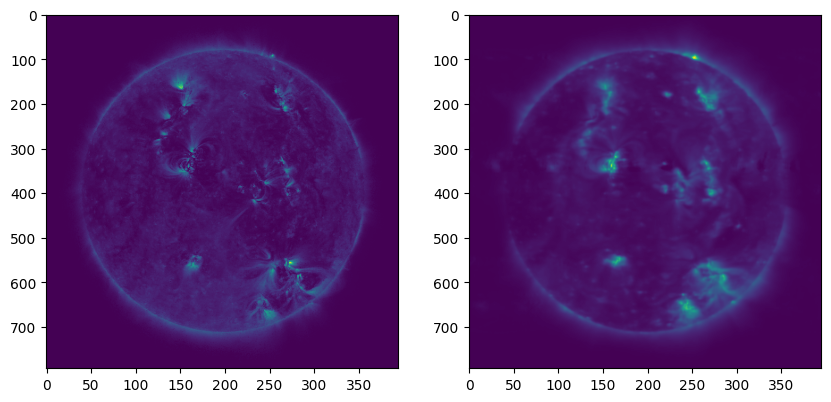

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(np.flipud(ground_truth[5].T))
axs[1].imshow(output[5])
axs[0].set_aspect(0.5)
axs[1].set_aspect(0.5)
